In [50]:
import math
import numpy as np

def rectangular_approximation(f, a, b, n):
    h = (b - a) / n
    area = 0
    for i in range(n):
        area += f(a + i * h)
    return area * h

def trapezoid_approximation(f, a, b, n):
    h = (b - a) / n
    area = 0
    for i in range(n):
        area += (f(a + i * h) + f(a + (i + 1) * h)) / 2
    return area * h

def simpson_approximation(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("n must be even.")
    
    h = (b - a) / n
    area = f(a) + f(b)

    for i in range(1, n, 2):
        area += 4 * f(a + i * h)  

    for i in range(2, n-1, 2):
        area += 2 * f(a + i * h)  

    return area * h / 3

In [2]:
def f(x):
    return 1/math.sqrt(x**2 + 1)

def F(x):
    return math.log(x + math.sqrt(x**2 + 1))

In [3]:
def calculate_absolute_error(numerical, analytical):
    return abs(numerical - analytical)

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_log_log_error(methods, f, analytical_integral, a, b, max_n):
    n_values = np.logspace(1, int(np.log10(max_n)), num=50, dtype=int)
    
    for method in methods:
        errors = []
        for n in n_values:
            if n % 2 == 1:
                n += 1 
            numerical_integral = method(f, a, b, int(n))
            analytical_value = analytical_integral(b) - analytical_integral(a)
            error = abs(numerical_integral - analytical_value)
            errors.append(error)
        
        plt.loglog(n_values, errors, marker='o', label=method.__name__)
    
    plt.xlabel('Number of subintervals (n)')
    plt.ylabel('Error')
    plt.title('Log-Log Plot of Error vs. Number of Subintervals')
    plt.legend()
    plt.grid(True)
    plt.show()

In [52]:
def plot_h_vs_error(methods, f, analytical_integral, a, b, max_n):
    n_values = np.logspace(1, int(np.log10(max_n)), num=50, dtype=int)
    
    for method in methods:
        errors = []
        h_values = []
        for n in n_values:
            if n % 2 == 1:
                n += 1
            h = (b - a) / n
            numerical_integral = method(f, a, b, int(n))
            analytical_value = analytical_integral(b) - analytical_integral(a)
            error = abs(numerical_integral - analytical_value)
            errors.append(error)
            h_values.append(h)
        
        plt.loglog(h_values, errors, marker='o', label=method.__name__)
    
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.title('Log-Log Plot of Error vs. h')
    plt.legend()
    plt.grid(True)
    plt.show()

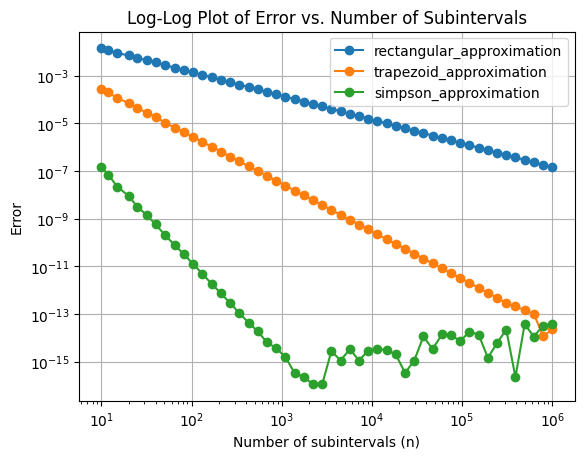

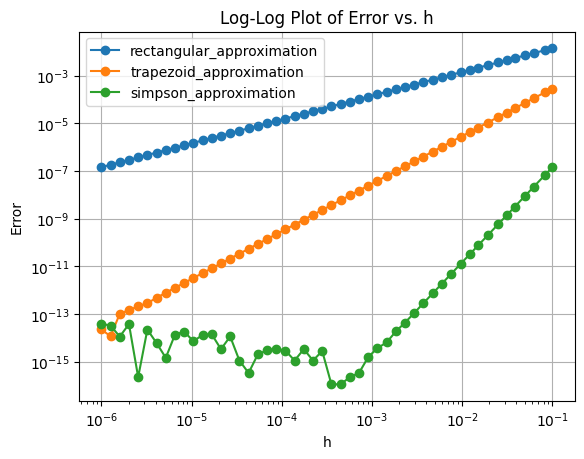

In [54]:
approximation_methods = [rectangular_approximation, trapezoid_approximation, simpson_approximation]
plot_log_log_error(approximation_methods, f, F, 0, 1, 10**6)
plot_h_vs_error(approximation_methods, f, F, 0, 1, 10**6)